In [18]:
import numpy as np
import matplotlib.pyplot as plt
from complexity import normEntropy, desequilibrium, complexityBounds
from symbol import symbolCount
from mpl_settings import *

def analyzeSeries(fileName, word_len):
    """
    
    Compute mean and standard deviation of variables H, D and C
    over the temporal series of 10 agents, using symbol analysis
    with a given word length.

    """

    n_words = np.math.factorial(word_len)

    # Read data
    data = np.loadtxt(fileName, dtype='float32', delimiter=',')

    properties = []
    # Compute H, D, C for each series
    for i in range(10):
        temporal_series = data[:, i]
        Z = symbolCount(temporal_series, word_len)
        #Z = 1. * Z / np.sum(Z)

        H = normEntropy(Z)
        D = desequilibrium(Z)
        C = H*D

        props = [H, D, C]
        properties.append(props)

    properties = np.array(properties)

    # Compute mean and standard deviation
    #mean_values = np.mean(properties,0)
    #std_values = np.std(properties,0)

    #return mean_values, std_values
    return properties

In [21]:
N = 120
H_range = np.arange(0.001, 1.0, 0.01)
Cmin_values, Cmax_values = complexityBounds(N, H_range)

/nfs/nfs7/home/nalmeira/medyfinol/code/complexity.py:88: RuntimeWarning: invalid value encountered in log2
  rhm = ( x*np.log2(x) + (1-x)*np.log2( (1-x)/(N-n-1) ) ) / np.log2(N)


In [3]:
properties = analyzeSeries('../simulaciones/series_agentes_rho_v2227.txt', 5)
mean_values = np.mean(properties, axis=0)
std_values = np.std(properties, axis=0)

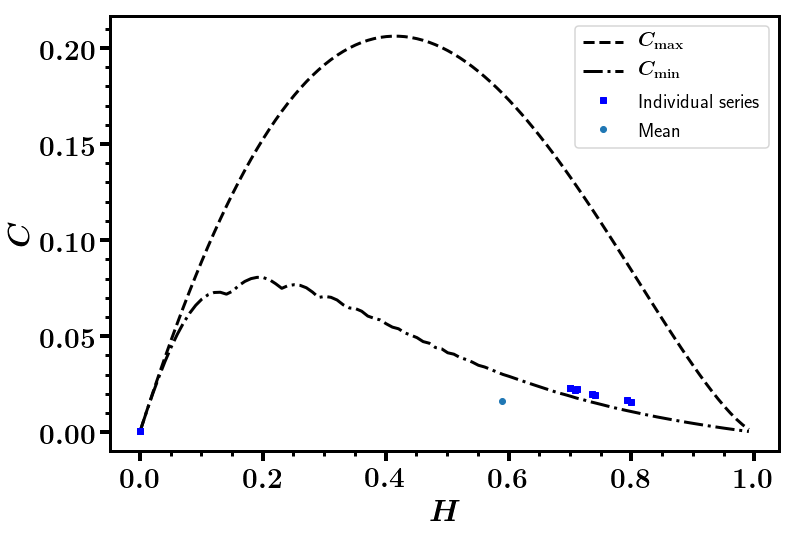

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(H_range, Cmax_values, '--', color='k', label=r'$C_{\mathrm{max}}$')
plt.plot(H_range, Cmin_values, '-.', color='k', label=r'$C_{\mathrm{min}}$')

plt.plot(H, C, 's', color='blue', label='Individual series')
for (H, D, C) in properties[1:]:
    plt.plot(H, C, 's', color='blue')
plt.plot(mean_values[0], mean_values[2], 'o', label='Mean')
plt.xlabel(r'$H$')
plt.ylabel(r'$C$')
plt.legend(loc='best', fontsize=20)
plt.savefig('../figs/H_vs_C.png')
plt.show()

In [5]:
properties

array([[7.10694219e-01, 3.17336213e-02, 2.25529012e-02],
       [5.17901464e-04, 9.91191946e-01, 5.13339759e-04],
       [7.40449831e-01, 2.64675298e-02, 1.95978780e-02],
       [7.99339814e-01, 1.97940196e-02, 1.58221479e-02],
       [7.08471511e-01, 3.11669242e-02, 2.20808779e-02],
       [8.40248431e-04, 9.90875540e-01, 8.32581618e-04],
       [7.92649254e-01, 2.09381344e-02, 1.65965966e-02],
       [7.10700643e-01, 3.16165848e-02, 2.24699272e-02],
       [7.35665601e-01, 2.69784327e-02, 1.98471049e-02],
       [6.99182083e-01, 3.27904691e-02, 2.29265085e-02]])